# Biodiversity Project

## Introduction

In this project, we will analyze data detailing (stuff about species in a bunch of national parks). During our analysis, we will (do yadayadayada and blahblahblah etc...)

### Data sources:

Out data consists of two csv files `observations.csv` and `species_info.csv` from (source). 

# Scoping

   ## Project goals:

   Throughout this project, we will seek to answer the following questions.
   
   1. What are the proportions of species in each conservation status?
   2. Are certain species at risk of becoming endagered?
   3. Is their a statistically significant difference between species and their conservation status?
   4. Which animal is the most prevelant and what is it's distribution across the parks?
   
   ## Data:

   In our first file, `observations.csv`, we have (interesting stuff). (Description of stuff).

And our second file, `species_info.csv`, we have (more interesting stuff). (Description of more interesting stuff). 

# Analysis

Throughout this project, we will calculate descriptive descriptive statistics and create data visualizations to understand our data better. We will also use statistical inference to draw conclusions about (something). At the end, we will later use our findings to answer the questions we posed earlier. 

Let's begin by loading the necessary modules we'll need for our analysis, along with our files.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

species = pd.read_csv('species_info.csv',encoding='utf-8')
observations = pd.read_csv('observations.csv',encoding='utf-8')
print('Species:')
print(species.head())

print("\n")

print('Observations:')
print(observations.head())

Species:
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


Observations:
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus 

In `species`, the column `conservation_status` seems to have a lot of missing values. Let's see what are its unique values, along with how many entries are missing. 

In [28]:
print(species['conservation_status'].unique())
print('\n')
print(species.info())
print('\n')
print(observations.info())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


It seems that most of the column has missing row entries. So first let's fill them. 

In [29]:
species=species.fillna('No Intervention')

print(species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB
None


Now that our dataframe `species` is complete, let's find the proportion of species in each conservation status. 

In [30]:
N=len(species)

conservation_tab = species.groupby('conservation_status')\
                        .scientific_name.nunique().reset_index()\
                        .rename(columns={'scientific_name':"count"})

conservation_tab['proportion'] = conservation_tab.apply(lambda x: x['count']/N, axis=1)

category_tab = species.groupby('category')\
                    .scientific_name.nunique().reset_index()\
                    .rename(columns={'scientific_name':"count"})
category_tab['proportion'] = category_tab.apply(lambda x: x['count']/N, axis=1)

print("Conservation status counts and proportions:")
print(conservation_tab)
print("\n")
print("Category counts and proportions:")
print(category_tab)

Conservation status counts and proportions:
  conservation_status  count  proportion
0          Endangered     15    0.002576
1         In Recovery      4    0.000687
2     No Intervention   5363    0.920845
3  Species of Concern    151    0.025927
4          Threatened     10    0.001717


Category counts and proportions:
            category  count  proportion
0          Amphibian     79    0.013565
1               Bird    488    0.083791
2               Fish    125    0.021463
3             Mammal    176    0.030220
4  Nonvascular Plant    333    0.057177
5            Reptile     78    0.013393
6     Vascular Plant   4262    0.731799


Immediately, we see that the majority of species require no intervention? But how about when grouped acrossed categories? Are certain animals in greater danger than others? According to the category counts and proportions, the majority of species, around 76 percent, are vascular plants. So perhaps they could (be skewing the data). 

Let's see what are the counts and proportions for `conservation_status` when grouped by `category`.

In [31]:
cons_cat_tab = species.groupby(['category','conservation_status'])\
                        .scientific_name.nunique().reset_index()\
                           .pivot(columns='conservation_status',index='category',values='scientific_name')\
                                .fillna(0)

print(cons_cat_tab)



conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                   1.0          0.0             72.0   
Bird                        4.0          3.0            413.0   
Fish                        3.0          0.0            115.0   
Mammal                      6.0          1.0            146.0   
Nonvascular Plant           0.0          0.0            328.0   
Reptile                     0.0          0.0             73.0   
Vascular Plant              1.0          0.0           4216.0   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                           4.0         2.0  
Bird                               68.0         0.0  
Fish                                4.0         4.0  
Mammal                             22.0         2.0  
Nonvascular Plant                   5.0         0.0  
Reptile                             

Immediately, we see that mammals have the greatest number of endangered species. But is this observation statistically significant? Are certain species more likely to become endangered than others? To generalize this, let's create a new column called `is_protected`.

In [32]:
species['is_protected']=species.apply(lambda x: "protected" if x['conservation_status']!="No Intervention" else "not_protected",axis=1)

T = species.groupby(["category","is_protected"])\
            .scientific_name.nunique().reset_index()\
                .pivot(columns="is_protected", index="category",values="scientific_name")\
                    .reset_index()

T.columns=['category','not_protected','protected']


T['Percentage_Protected'] = T.apply(lambda x: 100*x['protected']/(x['protected']+x['not_protected']), axis=1)

print(T)

            category  not_protected  protected  Percentage_Protected
0          Amphibian             72          7              8.860759
1               Bird            413         75             15.368852
2               Fish            115         11              8.730159
3             Mammal            146         30             17.045455
4  Nonvascular Plant            328          5              1.501502
5            Reptile             73          5              6.410256
6     Vascular Plant           4216         46              1.079305


From the results above, we see that birds and mammals have the two highest percentages of protected species? To see whether these observations are statistically significant, let's run a few chi-squared tests.

In [33]:
from scipy.stats import chi2_contingency

#Mammals and birds

C1=[[413,75],
   [146,30]]

chi_test1 = chi2_contingency(C1)

print(f"The p-value for mammals and birds is {chi_test1[1]}\n")

#Mammals and Amphibians

C2=[[72,7],
    [146,30]]
chi_test2 = chi2_contingency(C2)

print(f"The p-value for mammals and amphibians is {chi_test2[1]}\n")

#Mammals and Reptiles

C3=[[73,5],
    [146,30]]
chi_test3 = chi2_contingency(C3)

print(f"The p-value for mammals and reptiles is {chi_test3[1]}\n")

#Mammals and Fish

C4=[[115,11],
    [146,30]]
chi_test4 = chi2_contingency(C4)

print(f"The p-value for mammals and fish is {chi_test4[1]}\n")

#Birds and Amphibians

C5=[[72,7],
    [413,75]]
chi_test5 = chi2_contingency(C5)

print(f"The p-value for birds and amphibians is {chi_test5[1]}\n")

#Birds and Reptiles

C6=[[73,5],
    [413,75]]
chi_test6 = chi2_contingency(C6)

print(f"The p-value for birds and reptiles is {chi_test6[1]}\n")

#Birds and Fish

C7=[[115,11],
    [413,75]]
chi_test7 = chi2_contingency(C7)

print(f"The p-value for birds and fish is {chi_test4[1]}\n")





The p-value for mammals and birds is 0.6875948096661336

The p-value for mammals and amphibians is 0.12757669693198975

The p-value for mammals and reptiles is 0.03835559022969898

The p-value for mammals and fish is 0.0561483484489001

The p-value for birds and amphibians is 0.17593613249594683

The p-value for birds and reptiles is 0.053135422321542065

The p-value for birds and fish is 0.0561483484489001



From the results above, we can say with 90 percent confidence that mammals and birds are more likely to become endagered than other species,expect for maybe amphibians and plants

## Species in Parks

Now, let's move on to the next part of our analysis (in which we'll do something).

In [34]:
from itertools import chain
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,"")
    return text

categories = species['category'].unique()

C_names = species[species.category == "Mammal"].common_names\
            .apply(remove_punctuation)\
            .str.split().tolist()

cleanNames=[]

for names in C_names:
    names=list(set(names))
    cleanNames.append(names)
    
cleanNames = list(chain.from_iterable(i if isinstance(i,list) else [i] for i in cleanNames))                                       

(Observations about this)

In [35]:
word_counts=[]

for i in cleanNames:
    n=cleanNames.count(i)
    word_counts.append((i,n))
    
pd.DataFrame(set(word_counts),columns = ['Word','Count'])\
.sort_values("Count",ascending=False).head(10)

Word  Count
33        Bat     23
104     Shrew     18
2      Myotis     17
20      Mouse     16
27   Chipmunk     13
3    American     12
71   Squirrel     12
44       Vole     11
97    Eastern     11
58    Western     10

(more comments)

In [39]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b",regex=True)

species.head(10)

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   
5                                  White-Tailed Deer     No Intervention   
6                                Feral Hog, Wild Pig     No Intervention   
7                                             Coyote  Species of Concern   
8                                          Gray Wolf          Endangered   
9                                           Red Wolf          Endangered   

    is_protected  is_bat  
0  not_protected   False  
1  not_protected   False  
2  not_protected   False  
3  not_protected   False  
4  not_protected   False  
5  not_protected   False  
6  not_protected   False  
7      protected   False  
8      protected   False  
9      protected   False

(more comments)

In [41]:
species[species.is_bat]

category            scientific_name  \
28     Mammal   Corynorhinus rafinesquii   
29     Mammal           Eptesicus fuscus   
30     Mammal  Lasionycteris noctivagans   
31     Mammal          Lasiurus borealis   
32     Mammal          Lasiurus cinereus   
36     Mammal              Myotis leibii   
37     Mammal           Myotis lucifugus   
38     Mammal     Myotis septentrionalis   
39     Mammal             Myotis sodalis   
40     Mammal       Nycticeius humeralis   
3033   Mammal         Antrozous pallidus   
3034   Mammal    Corynorhinus townsendii   
3035   Mammal           Eptesicus fuscus   
3036   Mammal          Euderma maculatum   
3037   Mammal  Lasionycteris noctivagans   
3038   Mammal          Lasiurus cinereus   
3040   Mammal         Myotis ciliolabrum   
3042   Mammal           Myotis lucifugus   
4461   Mammal             Eumops perotis   
4462   Mammal      Tadarida brasiliensis   
4463   Mammal    Corynorhinus townsendii   
4464   Mammal      Lasiurus blossevillii   
4468   Mammal      Parastrellus hesperus   

                                           common_names conservation_status  \
28                           Rafinesque's Big-Eared Bat     No Intervention   
29                                        Big Brown Bat  Species of Concern   
30                                    Silver-Haired Bat  Species of Concern   
31                             Eastern Red Bat, Red Bat     No Intervention   
32                                            Hoary Bat     No Intervention   
36    Eastern Small-Footed Bat, Eastern Small-Footed...  Species of Concern   
37                Little Brown Bat, Little Brown Myotis  Species of Concern   
38             Northern Long-Eared Bat, Northern Myotis          Threatened   
39                Indiana Bat, Indiana Or Social Myotis          Endangered   
40                                          Evening Bat     No Intervention   
3033                             Pallid Bat, Pallid Bat  Species of Concern   
3034  Mule-Eared Bat, Pacific Townsend's Big-Eared B...     No Intervention   
3035                       Big Brown Bat, Big Brown Bat  Species of Concern   
3036                           Spotted Bat, Spotted Bat  Species of Concern   
3037               Silver-Haired Bat, Silver-Haired Bat  Species of Concern   
3038                               Hoary Bat, Hoary Bat     No Intervention   
3040  Small-Footed Myotis, Western Small-Footed Bat,...     No Intervention   
3042  Little Brown Bat, Little Brown Myotis, Little ...  Species of Concern   
4461                                Western Mastiff Bat     No Intervention   
4462                            Mexican Free-Tailed Bat     No Intervention   
4463                           Townsend's Big-Eared Bat     No Intervention   
4464                                    Western Red Bat  Species of Concern   
4468                                         Canyon Bat     No Intervention   

       is_protected  is_bat  
28    not_protected    True  
29        protected    True  
30        protected    True  
31    not_protected    True  
32    not_protected    True  
36        protected    True  
37        protected    True  
38        protected    True  
39        protected    True  
40    not_protected    True  
3033      protected    True  
3034  not_protected    True  
3035      protected    True  
3036      protected    True  
3037      protected    True  
3038  not_protected    True  
3040  not_protected    True  
3042      protected    True  
4461  not_protected    True  
4462  not_protected    True  
4463  not_protected    True  
4464      protected    True  
4468  not_protected    True

(more observations)

In [42]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

scientific_name                            park_name  \
0       Lasiurus blossevillii                  Bryce National Park   
1       Lasiurus blossevillii  Great Smoky Mountains National Park   
2       Lasiurus blossevillii               Yosemite National Park   
3       Lasiurus blossevillii            Yellowstone National Park   
4    Corynorhinus rafinesquii               Yosemite National Park   
..                        ...                                  ...   
139            Myotis sodalis            Yellowstone National Park   
140             Myotis leibii               Yosemite National Park   
141             Myotis leibii                  Bryce National Park   
142             Myotis leibii  Great Smoky Mountains National Park   
143             Myotis leibii            Yellowstone National Park   

     observations category                                       common_names  \
0             113   Mammal                                    Western Red Bat   
1              70   Mammal                                    Western Red Bat   
2             123   Mammal                                    Western Red Bat   
3             221   Mammal                                    Western Red Bat   
4             188   Mammal                         Rafinesque's Big-Eared Bat   
..            ...      ...                                                ...   
139            68   Mammal              Indiana Bat, Indiana Or Social Myotis   
140           132   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
141            84   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
142            49   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   
143           233   Mammal  Eastern Small-Footed Bat, Eastern Small-Footed...   

    conservation_status   is_protected  is_bat  
0    Species of Concern      protected    True  
1    Species of Concern      protected    True  
2    Species of Concern      protected    True  
3    Species of Concern      protected    True  
4       No Intervention  not_protected    True  
..                  ...            ...     ...  
139          Endangered      protected    True  
140  Species of Concern      protected    True  
141  Species of Concern      protected    True  
142  Species of Concern      protected    True  
143  Species of Concern      protected    True  

[144 rows x 8 columns]

(more observations)

In [43]:
bat_observations.groupby('park_name').observations.sum().reset_index()

park_name  observations
0                  Bryce National Park          3433
1  Great Smoky Mountains National Park          2411
2            Yellowstone National Park          8362
3               Yosemite National Park          4786

(more observations)

In [45]:
obs_by_park = bat_observations.groupby(['park_name','is_protected']).observations.sum().reset_index()\
                              .pivot(columns='is_protected', index='park_name',values='observations')
obs_by_park

is_protected                         not_protected  protected
park_name                                                    
Bryce National Park                           1596       1837
Great Smoky Mountains National Park           1299       1112
Yellowstone National Park                     4044       4318
Yosemite National Park                        2345       2441

(more comments)

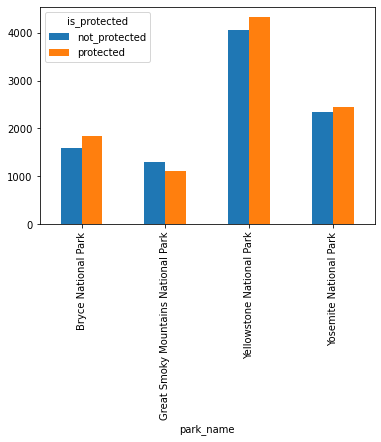

In [55]:
obs_by_park.plot(kind='bar')
plt.show()

## Conclusions

(conclusions go here)

## Further Research

(further research goes here)